In [31]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #to pot the histogram 
import math

In [32]:
#importing the dataset
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

In [36]:
N =5  # total no of user
d= 10 # ten types of ads
ads_selected= list()
numbers_selected = [0]*d # we wanted to create a list of 10 zero 
sum_of_rewards=[0]*d #we are calculating the total rewards initially it is zero
total_rewards = 0 # initailly it is zero 


In [37]:
#now we are going to put the whole dataset into iteration
for n in range(0,N):
    # the aim is to find the value which is the highest upper bound
    ad=0
    # now we are going to next iteration to iterate over the all the 10 ads by column by column
    # for each iteration we gonna find the upper confidence bound
    max_upper_bound= 0 # we need to find the maximum upper bound so i am creating this variable
    #initially it is zero 

    for i in range (0,d):
        #if the ads inde(i) will aldready had been selected
        if numbers_selected[i] > 0:
            #if it is true the we go to find the avg reward
            average_reward = sum_of_rewards[i] / numbers_selected[i] # this is riBar(n)
            # now we need to compute the delta i
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_selected[i]) # hear n+1 is for avoid the infinity error
            # if we put n the the first iteration will be the 0 , Then the 0 is divided by any thing will be the zero
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 # this will be the biggest value it is not infinity but is the largest value 1 the expontial power of 400
        # no we need to define the  maximum upper bound based on the condition
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            print("UPB :",upper_bound)
            print("max_upper_bound :",max_upper_bound)
            ad= i # this i is what means we are working on the particular i 
            # tha variable ad have the index value
    ads_selected.append(ad)
    #numbers_selected = [0]*d = [0,0,0,0,0,0,0,0,0,0]
    numbers_selected[ad]+=1
    reward=dataset.values[n, ad]
    sum_of_rewards[ad]= sum_of_rewards[ad] + reward
    total_rewards=total_rewards+reward
    '''lets say 
    chat gpt will break down this
    Let me explain the line `numbers_selected[ad] += 1` in detail for your scenario. Here's a step-by-step breakdown:

### Variables in Context:
1. **`numbers_selected`**:
   - It is a list of size `d` (10 in this case).
   - Each index represents an ad (from 0 to 9).
   - The value at each index indicates how many times the corresponding ad has been selected by the algorithm so far.

   Example (initially): 
   numbers_selected = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

2. **`ad`**:
   - This is the index of the ad with the highest **Upper Confidence Bound (UCB)** for the current iteration. 
   - When an ad is selected, we increment its count in `numbers_selected`.

3. **`numbers_selected[ad] += 1`**:
   - After selecting the ad `ad`, you increment its count in the `numbers_selected` list.
   - This means the selected ad is chosen one more time.

### Example Walkthrough:

- At the beginning:
  numbers_selected = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # No ads selected yet


- **Iteration 1**:
  - Assume `ad = 3` is selected (the ad with the highest UCB).
  - `numbers_selected[ad] += 1` increments the value at index 3.
  numbers_selected = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


- **Iteration 2**:
  - Assume `ad = 7` is selected in this iteration.
  - Increment the count for ad 7.
  numbers_selected = [0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


- **Iteration 3**:
  - Assume `ad = 3` is selected again.
  - Increment the count for ad 3.
  numbers_selected = [0, 0, 0, 2, 0, 0, 0, 1, 0, 0]

This way, `numbers_selected` keeps track of how many times each ad has been shown to users.'''


#finally it becomes numbers_selected = [8000, 500, 700, 300, 200, 100, 50, 50, 50, 50] the the highest value which is 8000 that index is the 0 . the 0 represent the first ad



'''
Purpose:
This information is critical for calculating the **Upper Confidence Bound** (UCB) in future iterations:
- If an ad has been selected many times, its UCB tends to decrease because we are more confident in its performance.
- Ads that are less frequently selected get a higher UCB, encouraging exploration.

The algorithm ensures a balance between **exploitation** (choosing ads with high rewards) and **exploration** (trying out less-selected ads).
'''




UPB : inf
max_upper_bound : inf
UPB : 2.019666990168809
max_upper_bound : 2.019666990168809
UPB : inf
max_upper_bound : inf
UPB : 2.2837127533066592
max_upper_bound : 2.2837127533066592
UPB : inf
max_upper_bound : inf
UPB : 2.4420268866008827
max_upper_bound : 2.4420268866008827
UPB : inf
max_upper_bound : inf
UPB : 2.5537557300461198
max_upper_bound : 2.5537557300461198
UPB : inf
max_upper_bound : inf


'\nPurpose:\nThis information is critical for calculating the **Upper Confidence Bound** (UCB) in future iterations:\n- If an ad has been selected many times, its UCB tends to decrease because we are more confident in its performance.\n- Ads that are less frequently selected get a higher UCB, encouraging exploration.\n\nThe algorithm ensures a balance between **exploitation** (choosing ads with high rewards) and **exploration** (trying out less-selected ads).\n'

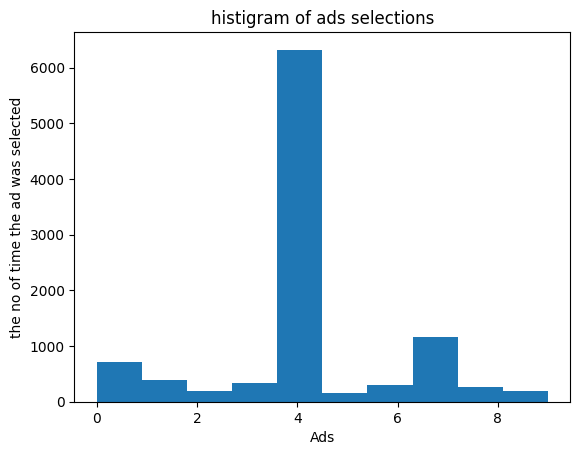

In [35]:
#ploting the data to find the best ad 
plt.hist(ads_selected)
plt.title("histigram of ads selections")
plt.xlabel("Ads")
plt.ylabel("the no of time the ad was selected")
plt.show()
